In [0]:
import urllib
from gensim.models import word2vec, KeyedVectors
import networkx as nx
import numpy as np

In [0]:
#можете выбрать свою модель или загрузить эту (тогда раскомментируйте)
#urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz",
#                           "ruscorpora_mystem_cbow_300_2_2015.bin.gz")

#m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

if m.endswith('.vec.gz'):
    model = KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = KeyedVectors.load(m)

In [0]:
with open('etnonyms.txt', encoding='utf-8') as f:
    text = f.read().split()
names = [name + '_S' for name in text]

In [0]:
nodes = []
for name in names:
    if name in model:
        nodes.append(name)

In [0]:
#осторожно, если это перезапустить, граф и интерпретации будут уже неправильными
#посмотрите сначала на то, что у меня есть, а потом уже запускайте, пожалуйста

first_nodes = random.sample(nodes, 3)
first_nodes

['швейцарка_S', 'венгр_S', 'славянин_S']

In [0]:
def add_nodes(graph, to_nodes):
    for node in to_nodes:
        similar = model.most_similar(node)
        most_sim = [i[0] for i in similar if i[1] > 0.5 and i[0].endswith('_S')]
        graph.add_nodes_from(most_sim)
        graph.add_edges_from([(node, sim_node) for sim_node in most_sim])

In [0]:
G = nx.Graph()
G.add_nodes_from(first_nodes)
add_nodes(G, first_nodes)
second_nodes = list(G.nodes())
for fn in first_nodes:
    second_nodes.remove(fn)
add_nodes(G, second_nodes)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
items = nx.degree_centrality(G).items()
matrix = np.array([[item[0] for item in items], [item[1] for item in items]])
matrix[0][matrix[1].argsort()][:-4:-1]

array(['немец_S', 'француз_S', 'украинец_S'], dtype='<U19')

In [0]:
items = nx.betweenness_centrality(G).items()
matrix = np.array([[item[0] for item in items], [item[1] for item in items]])
matrix[0][matrix[1].argsort()][:-4:-1]

array(['украинец_S', 'немец_S', 'болгарин_S'], dtype='<U22')

In [0]:
items = nx.closeness_centrality(G).items()
matrix = np.array([[item[0] for item in items], [item[1] for item in items]])
matrix[0][matrix[1].argsort()][:-4:-1]

array(['венгр_S', 'поляк_S', 'немец_S'], dtype='<U19')

In [0]:
items = nx.eigenvector_centrality(G).items()
matrix = np.array([[item[0] for item in items], [item[1] for item in items]])
matrix[0][matrix[1].argsort()][:-4:-1]

array(['швейцарка_S', 'немец_S', 'француз_S'], dtype='<U20')

In [0]:
from networkx.exception import NetworkXError

print('Плотность:', nx.density(G))
try:
    print('Диаметр:', nx.diameter(G))
except NetworkXError:
    print('Граф несвязный, диаметр бесконечный')
try:
    print('Радиус:', nx.radius(G))
except NetworkXError:
    print('Граф несвязный, радиус не считается')
print('Коэффициент кластеризации:', nx.average_clustering(G))
print('Коэффициент ассортативности:', nx.degree_pearson_correlation_coefficient(G))

Плотность: 0.10512820512820513
Граф несвязный, диаметр бесконечный
Граф несвязный, радиус не считается
Коэффициент кластеризации: 0.3430952380952381
Коэффициент ассортативности: -0.4619564452327661


In [0]:
from networkx.algorithms import community


com = community.greedy_modularity_communities(G)
com

[frozenset({'австриец_S',
            'американец_S',
            'англичанин_S',
            'бельгиец_S',
            'гитлеровец_S',
            'голландец_S',
            'испанец_S',
            'итальянец_S',
            'немец_S',
            'португалец_S',
            'пруссак_S',
            'фашист_S',
            'француз_S',
            'швед_S',
            'шведов_S',
            'японец_S'}),
 frozenset({'армянин_S',
            'белорус_S',
            'грузин_S',
            'еврей_S',
            'латыш_S',
            'литовец_S',
            'малоросс_S',
            'поляк_S',
            'поляков_S',
            'славянин_S',
            'татарин_S',
            'украинец_S'}),
 frozenset({'венгр_S',
            'румын_S',
            'словак_S',
            'словенец_S',
            'финн_S',
            'чех_S'}),
 frozenset({'болгарин_S', 'серб_S', 'турок_S', 'хорват_S', 'черногорец_S'}),
 frozenset({'швейцарка_S'})]

Первый кластер содержит западных европейцев, гитлеровцев и фашистов, а также непонятно как затесавшихся японцев.
Второй кластер -- в основном жители ближнего зарубежья и примкнувшие к ним татарин и еврей.
Третий кластер очень странный, но похож на не очень далёкую Европу.
Четвёртый кластер -- что-то очень балканское.
А швейцарка вообще не связана ни с чем (потому что женского рода?)

In [0]:
def color_nodes(G, pos, nodes, color):
    nx.draw_networkx_nodes(G, pos, node_color=color, nodelist=nodes,
                       node_size=[v * 30 for v in d.values()], alpha=0.7)

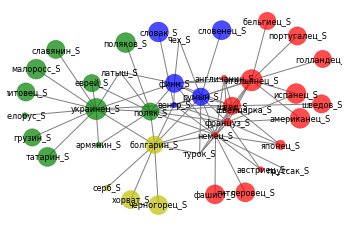

In [123]:
import matplotlib.pyplot as plt
from matplotlib import style


style.use('ggplot') 

pos=nx.kamada_kawai_layout(G)
d = dict(G.degree)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
i = 0
for gcom in com:
    color_nodes(G, pos, gcom, colors[i])
    i += 1
nx.draw_networkx_edges(G, pos, edge_color='grey')
nx.draw_networkx_labels(G, pos, font_size=8, font_family='Arial')
plt.axis('off')
plt.show()